# Basic Analysis of Survey Data - financial condition

## 1. Import data

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file to pandas df
csv_file_path = '2020_survey_data.csv'
df = pd.read_csv(csv_file_path)

In [3]:
df.head()

,PID,HNO,AREA,EDM,ANS_TYPE,ANS_SUB1,ANS_SUB2,ANS_SUB3,S9_0,S9_2,...,RES_YY,RES_MM,RES_AGE,RES_MAR,RES_EDU1,RES_EDU2,RES_YN,RES_SUB,f_wgt1,s_wgt1
0,7501,1,35,2,0,99,999,1,0,99,...,1952,10,67,1,4,9,1,9,393.325736,0.512734
1,7601,1,35,2,0,99,999,1,0,99,...,1951,12,68,3,2,0,1,9,393.325736,0.512734
2,7802,2,23,1,0,99,999,1,1,1,...,1954,3,66,2,5,12,1,9,587.163656,0.765418
3,7801,1,23,1,0,99,999,1,0,99,...,1954,1,66,2,5,12,1,9,640.643430,0.835133
4,8001,1,35,1,0,99,999,1,0,99,...,1951,12,68,3,3,6,1,9,493.769927,0.643671


## 2. Data Preprocessing

핵심적인 변수는 아래와 같습니다:

경제적 상황 관련 변수:
- J3b_3_13: 가구_총수입액_금액
- J4: 작년 한 해 월평균 소비지출액(가구)
- J4_1: 작년 한 해 월평균 주거비 지출액(가구)
- J5: 지출 생활비 중 가장 부담되는 항목(가구)
- J6a_1: 부동산 자산 유무
- J6b_1: 부동산 자산 금액 (만원)
- J6a_2: 금융자산 유무
- J6b_2: 금융자산 금액 (만원)
- J6a_3: 기타자산_유무
- J6b_3: 기타자산_금액
- J6a_4: 부채_유무
- J6b_4: 부채_금액
- E1_6: 월 소득

노인 신상 정보 관련 변수:
- RES_SEX: 설문조사 대상자 성별 (1: 남자, 2: 여자, 9: 비해당)
- RES_AGE: 노인 조사 대상자 만연령
- RES_MAR: 노인 조사 대상자 혼인상태
- RES_EDU1: 노인 조사 대상자 교육수준 (1-7: 숫자가 높을수록 교육수준 높음, 9는 비해당)
- AREA: 주거지

가족 관련 정보:
- S5_1: 총 가구원 수
- S5_2: 노인(만65세 이상) 가구원 수
- HTYPE: 노인가구형태

### 2-1: 데이터가 누락된 열을 제거합니다.

In [4]:
df.shape

(10097, 915)

In [5]:
# 1. 가구 총 수입액, 월평균 소비지출액, 월평균 주거비 지출액, 월소득 결측치 제거
df = df[df["J3b_3_13"] != 999998]
df = df[df["J3b_3_13"] != 999999]
df = df[df["J4"] != 999998]
df = df[df["J4"] != 999999]
df = df[df["J4_1"] != 999998]
df = df[df["J4_1"] != 999999]
df = df[df["E1_6"] != 99998]
df = df[df["E1_6"] != 99999]

In [6]:
df.shape

(3772, 915)

In [7]:
# 2. 부동산 자산 금액, 금융자산 금액, 기타자산 금액, 부채 금액 결측치 제거
df = df[df["J6b_1"] != 999998]
df = df[df["J6b_1"] != 999999]
df = df[df["J6b_2"] != 999998]
df = df[df["J6b_2"] != 999999]
df = df[df["J6b_3"] != 999998]
df = df[df["J6b_3"] != 999999]
df = df[df["J6b_4"] != 999998]
df = df[df["J6b_4"] != 999999]

In [8]:
df.shape

(3743, 915)

### 2-2. 합, 비율 등 구하기

#### 2-2-1. 가구 월평균 주거비/ 월평균 총소비 *(주거비용 부담을 나타냅니다) *

In [9]:
df['rent_portion'] = df['J4_1']/df['J4']

#### 2-2-2. 부동산 자산  + 금융자산 + 기타자산 - 부채 금액 *(순 자본을 나타냅니다)*

In [10]:
df['total_equity'] = df['J6b_1'] + df['J6b_2'] + df['J6b_3'] - df['J6b_4']

#### 2-2-3. 월평균 소비지출액 / 가구수 *(가구수 만큼 나눠줍니다)*

In [11]:
df['monthly_spending_per_capita'] = df['J4'] / df['S5_1']

#### 2-2-4. 월평균 총소비 - 월평균 주거비

In [12]:
df['monthly_spending_no_rent'] = df['J4'] - df['J4_1']

#### 2-2-5. (월평균 총소비 - 월평균 주거비) / 가구수 *(주거비 이외의 비용을 나타냅니다)*

In [13]:
df['monthly_spending_no_rent_per_capita'] = df['monthly_spending_no_rent']/df['S5_1']

## 3. Data Visualization

그려볼 만한 것들:

1-변수 하나
- 자본의 분포
- 월세비율 분포
- 소비지출액 분포
- per capita 소비지출의 분포
- 소득분포

2-지역에 따른 분포
- 지역에 따른 자본의 분포
- 지역에 따른 월세비율 분포
- 지역에 따른 소비지출의 분포
- 지역에 따른 per capita 소비지출의 분포

3-연령에 따른 분포
- 연령에 따른 자본의 분포
- 연령에 따른 소비지출의 분포
- 연령에 따른 per capita 소비지출의 분포

4-성별에 따른 분포
- 성별에 따른 소득의 분포
- 성별에 따른 소비지출의 분포
- 성별과 연령 plot
- 성별에 따른 per capita 소비지출의 분포


#### 1.1. 자본의 분포 (부동산 자산  + 금융자산 + 기타자산 - 부채 금액)

In [14]:
df['total_equity'].describe()

count      3743.000000
mean      24237.318728
std       38669.782873
min      -56917.000000
25%        7000.000000
50%       15431.000000
75%       27800.000000
max      961751.000000
Name: total_equity, dtype: float64

#### 1.2 월세비율 분포

In [15]:
df["rent_portion"].describe()

count    3743.000000
mean        0.193135
std         0.168498
min         0.000000
25%         0.092593
50%         0.142857
75%         0.208818
max         1.000000
Name: rent_portion, dtype: float64

#### 1.3 월평균 지출의 분포

In [16]:
df['J4'].describe()

count    3743.000000
mean      147.235640
std        98.557623
min        10.000000
25%        90.000000
50%       130.000000
75%       198.500000
max      1500.000000
Name: J4, dtype: float64

#### 1.4 월평균 지출 per capita 지출

In [17]:
df['monthly_spending_per_capita'].describe()

count    3743.00000
mean       83.09520
std        56.78234
min         5.00000
25%        50.00000
50%        75.00000
75%       100.00000
max      1200.00000
Name: monthly_spending_per_capita, dtype: float64

#### 1.5 주거비 제외 월평균 지출 분포

In [18]:
df['monthly_spending_no_rent'].describe()

count    3743.000000
mean      123.358536
std        95.286817
min         0.000000
25%        65.000000
50%       105.000000
75%       163.000000
max      1480.000000
Name: monthly_spending_no_rent, dtype: float64

#### 1.6 인당 월평균 주거비 제외 지출 분포

In [19]:
df['monthly_spending_no_rent_per_capita'].describe()

count    3743.000000
mean       69.067579
std        54.299845
min         0.000000
25%        40.000000
50%        60.000000
75%        85.000000
max      1190.000000
Name: monthly_spending_no_rent_per_capita, dtype: float64

In [33]:
df["E3_3a"].describe()

count     3743.000000
mean     23931.921453
std      42522.730740
min          0.000000
25%        100.000000
50%        200.000000
75%        600.000000
max      99999.000000
Name: E3_3a, dtype: float64

#### Histograms

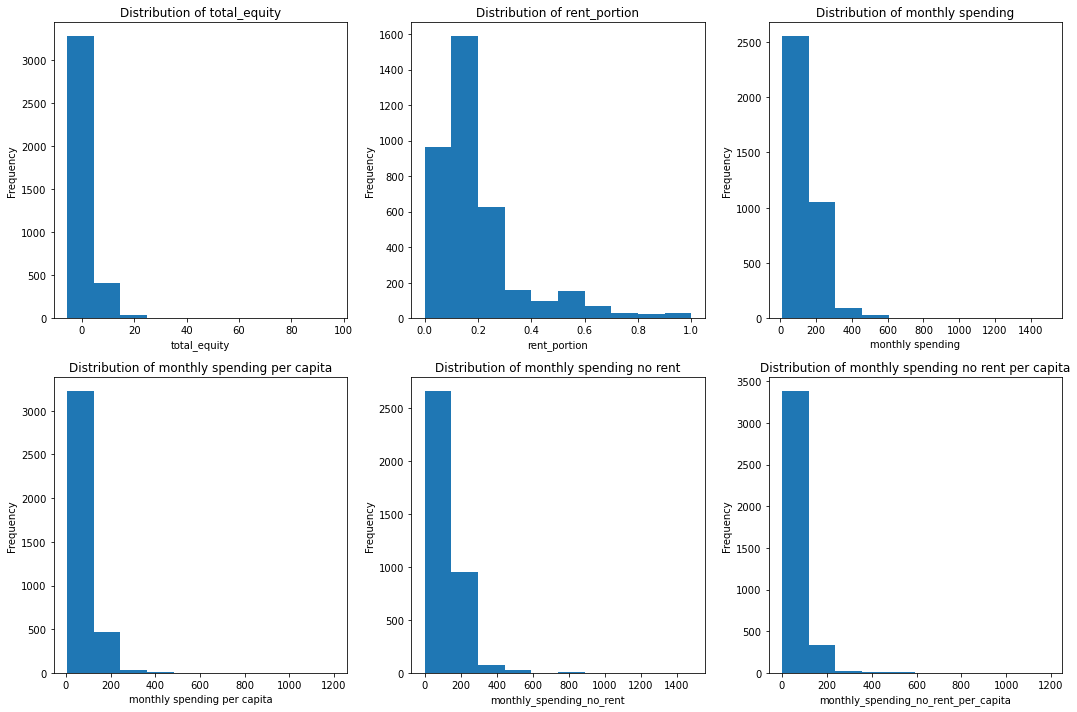

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15,10))

# total_equity histogram
axs[0, 0].hist(df['total_equity']/10000)
axs[0, 0].set_xlabel('total_equity')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of total_equity')

# rent_portion histogram
axs[0, 1].hist(df['rent_portion'])
axs[0, 1].set_xlabel('rent_portion')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of rent_portion')

# J4 histogram
axs[0, 2].hist(df['J4'])
axs[0, 2].set_xlabel('monthly spending')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Distribution of monthly spending')

# monthly_spending_per_capita histogram
axs[1, 0].hist(df['monthly_spending_per_capita'])
axs[1, 0].set_xlabel('monthly spending per capita')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of monthly spending per capita')

# monthly_spending_no_rent histogram
axs[1, 1].hist(df['monthly_spending_no_rent'])
axs[1, 1].set_xlabel('monthly_spending_no_rent')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of monthly spending no rent')

# monthly_spending_no_rent_per_capita histogram
axs[1, 2].hist(df['monthly_spending_no_rent_per_capita'])
axs[1, 2].set_xlabel('monthly_spending_no_rent_per_capita')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].set_title('Distribution of monthly spending no rent per capita')

plt.tight_layout()
plt.show()


#### 2.2. 지역에 따른 자본의 분포

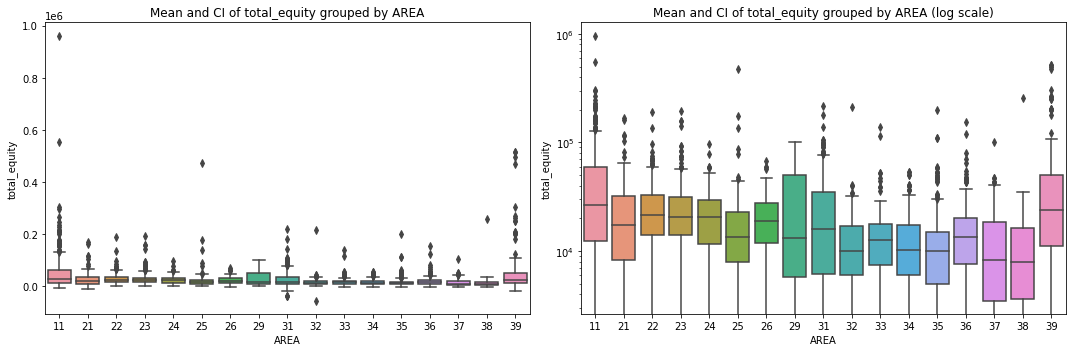

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(x='AREA', y='total_equity', data=df, ax=axs[0])
axs[0].set_title('Mean and CI of total_equity grouped by AREA')

# log scale
sns.boxplot(x='AREA', y='total_equity', data=df, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_title('Mean and CI of total_equity grouped by AREA (log scale)')

plt.tight_layout()
plt.show()

*11-서울 21-부산 22-대구 23-인천 24-광주 25-대전 26-울산 29-세종 31-경기 32-강원 33-충북 34-충남 35-전북 36-전남 37-경북 38-경남 39-제주*

서울, 세종, 제주 세 지역이 가장 높고, 편차도 더 심하네요 :)

#### 2.2. 지역에 따른 월 주거비 비율의 분포

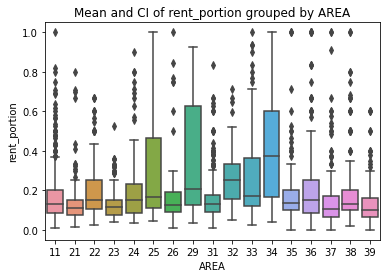

In [23]:
sns.boxplot(x='AREA', y='rent_portion', data=df)
plt.title('Mean and CI of rent_portion grouped by AREA')
plt.show()

*11-서울 21-부산 22-대구 23-인천 24-광주 25-대전 26-울산 29-세종 31-경기 32-강원 33-충북 34-충남 35-전북 36-전남 37-경북 38-경남 39-제주*

부동산 가격과 총지출 중 주거비의 비율은 또렷한 양의 상관관계를 보이는 것 같지는 않습니다. 자금력이 탄탄한 분들이 비싼 지역에 머문다고도 볼 수 있겠네요. 

오히려 평균자본이 낮은 지역의 월세비율이 높습니다. "자본이 적다 -> 집이 없거나 사정이 빠듯하다 -> 월세비율이 높다"로 볼수도 있겠네요.

다만 세종은 부동산 주거비 비율이 높습니다. 지레 짐작해보지만, 공무원 분들이 세종에 대출 받아 집을 사고 이후 집값이 가파르게 뛴 결과가 아닐까 싶네요.

#### 2.3. 지역에 따른 소비분포 비율

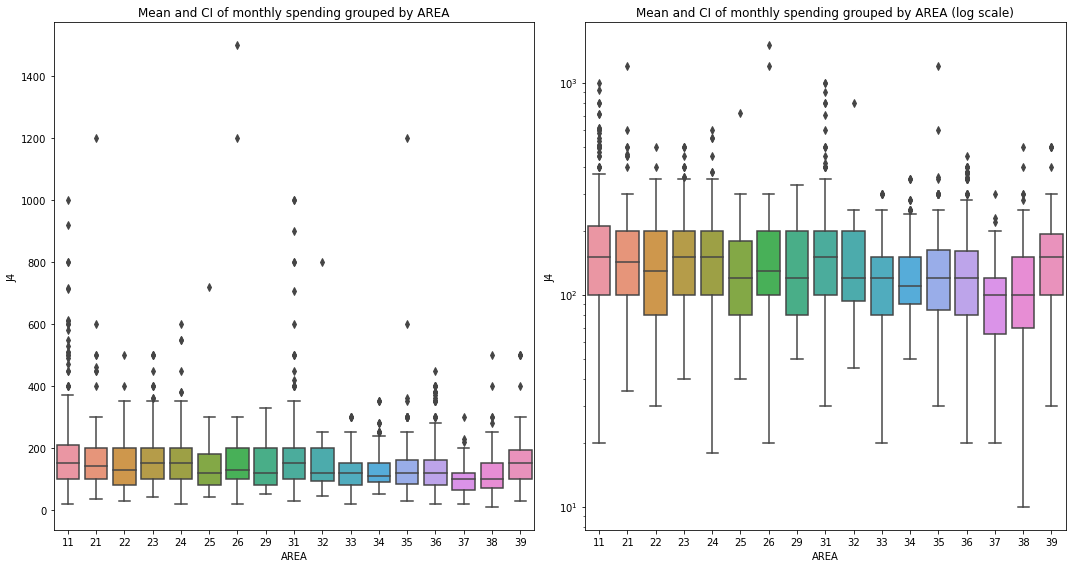

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='AREA', y='J4', data=df, ax=axs[0])
axs[0].set_title('Mean and CI of monthly spending grouped by AREA')

# log scale
sns.boxplot(x='AREA', y='J4', data=df, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_title('Mean and CI of monthly spending grouped by AREA (log scale)')

plt.tight_layout()
plt.show()

*11-서울 21-부산 22-대구 23-인천 24-광주 25-대전 26-울산 29-세종 31-경기 32-강원 33-충북 34-충남 35-전북 36-전남 37-경북 38-경남 39-제주*

서울, 인천, 경기 같은 수도권과 세종, 제주의 소비수준이 높은 것을 확인 할 수 있습니다.

#### 2.4 지역에 따른 월세 제외 소비, 인당 월세 제외 소비

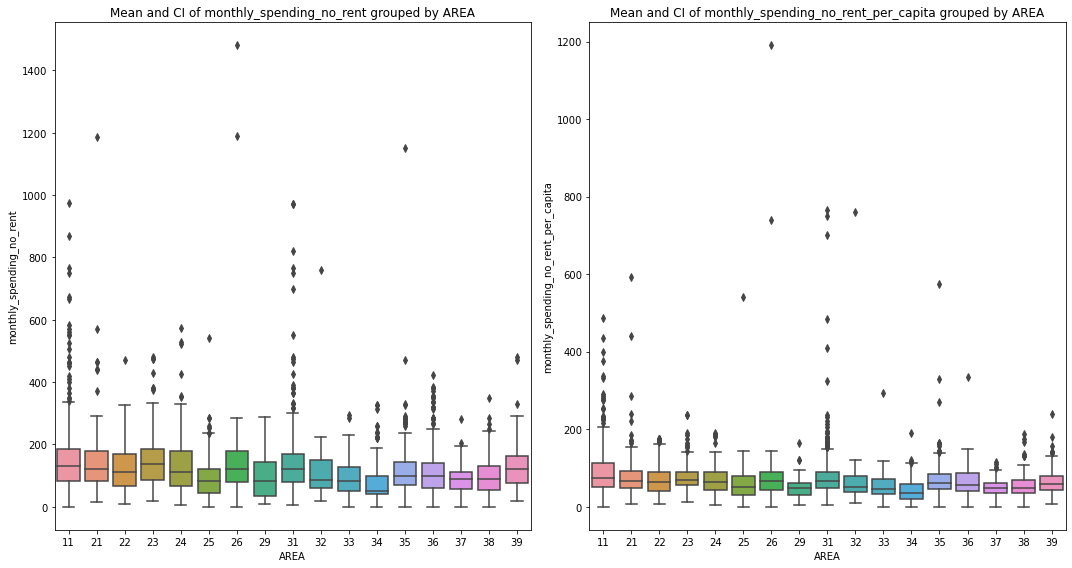

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(x='AREA', y='monthly_spending_no_rent', data=df, ax=axs[0])
axs[0].set_title('Mean and CI of monthly_spending_no_rent grouped by AREA')

# log scale
sns.boxplot(x='AREA', y='monthly_spending_no_rent_per_capita', data=df, ax=axs[1])
axs[1].set_title('Mean and CI of monthly_spending_no_rent_per_capita grouped by AREA')

plt.tight_layout()
plt.show()

*11-서울 21-부산 22-대구 23-인천 24-광주 25-대전 26-울산 29-세종 31-경기 32-강원 33-충북 34-충남 35-전북 36-전남 37-경북 38-경남 39-제주*

월세를 제외하고 인당 소비로 봐도 큰 차이는 없어보입니다.

#### 2.5: 지역별 분포 요약

- 자산 방면으론 서울, 세종, 제주 같은 지역이 높은 편입니다. 
- 주거비 지출 방면으론 대체로 자산수준이 높은 지역이 월세지출 부담도 적습니다. 다만 세종은 자산이 높지만 주거비 지출 부담도 높은 편입니다. 
- 서울, 경인, 그리고 세종, 제주의 소비수준이 높은 것을 확인할 수 있습니다.

#### 3.1 연령에 따른 자본 분포

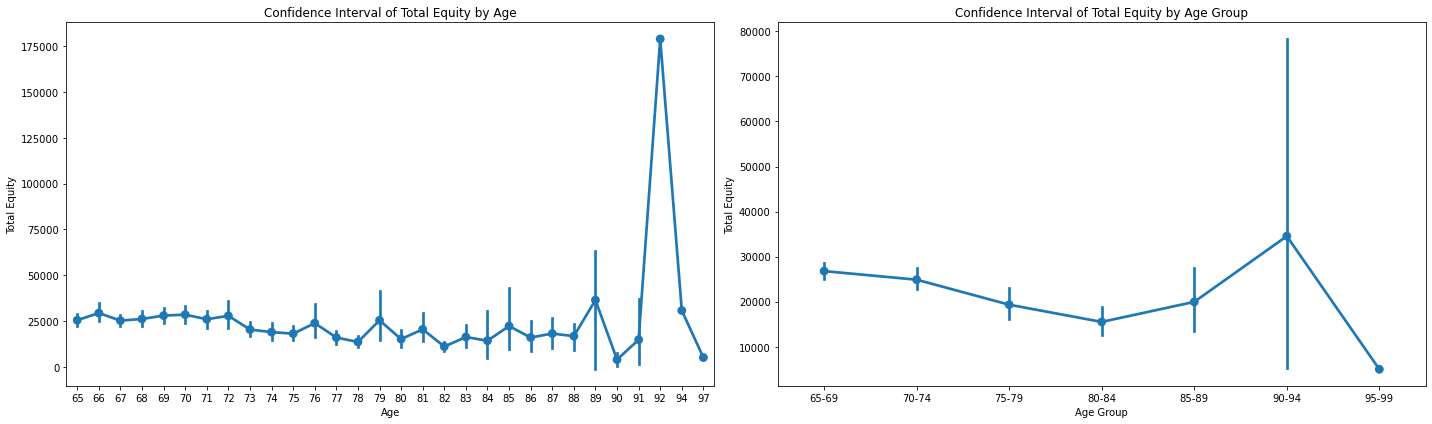

In [26]:
# Creating a new column 'age_group' by binning the 'RES_AGE' into groups of 5 years
bins = np.arange(65, df['RES_AGE'].max() + 5, 5)  # Bins start from 65 to max age, step = 5
labels = [f'{i}-{i+4}' for i in bins[:-1]]  # Labels for each bin (group), e.g., '65-69'
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, labels=labels, right=False)

# Creating a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the first point plot on the first subplot
sns.pointplot(x='RES_AGE', y='total_equity', data=df, ci=95, ax=axes[0])
axes[0].set_title('Confidence Interval of Total Equity by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Equity')

# Plotting the second point plot on the second subplot
sns.pointplot(x='age_group', y='total_equity', data=df, ci=95, order=labels, ax=axes[1])
axes[1].set_title('Confidence Interval of Total Equity by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Total Equity')

# Displaying the plot
plt.tight_layout()
plt.show()


자본의 경우, 나이에 따라 어느 정도 감소하는 트렌드를 볼 수 있습니다. 

#### 3.2. 연령에 따른 소비의 분포

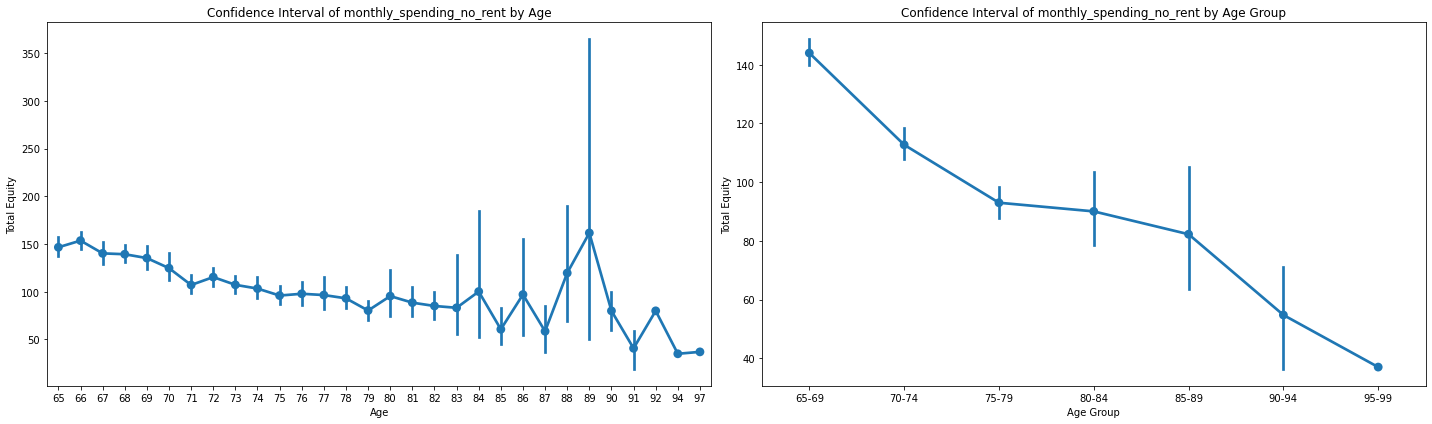

In [27]:
# Creating a new column 'age_group' by binning the 'RES_AGE' into groups of 5 years
bins = np.arange(65, df['RES_AGE'].max() + 5, 5)  # Bins start from 65 to max age, step = 5
labels = [f'{i}-{i+4}' for i in bins[:-1]]  # Labels for each bin (group), e.g., '65-69'
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, labels=labels, right=False)

# Creating a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the first point plot on the first subplot
sns.pointplot(x='RES_AGE', y='monthly_spending_no_rent', data=df, ci=95, ax=axes[0])
axes[0].set_title('Confidence Interval of monthly_spending_no_rent by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Equity')

# Plotting the second point plot on the second subplot
sns.pointplot(x='age_group', y='monthly_spending_no_rent', data=df, ci=95, order=labels, ax=axes[1])
axes[1].set_title('Confidence Interval of monthly_spending_no_rent by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Total Equity')

# Displaying the plot
plt.tight_layout()
plt.show()


In [28]:
correlation = df["RES_AGE"].corr(df["monthly_spending_no_rent"])
print("Correlation: ", correlation)

Correlation:  -0.23159690945257316


소비 행태 역시 나이에 따라 줄어드는 경향을 보입니다.

#### 3.3 연령에 따른 인당 월평균 소비 분포

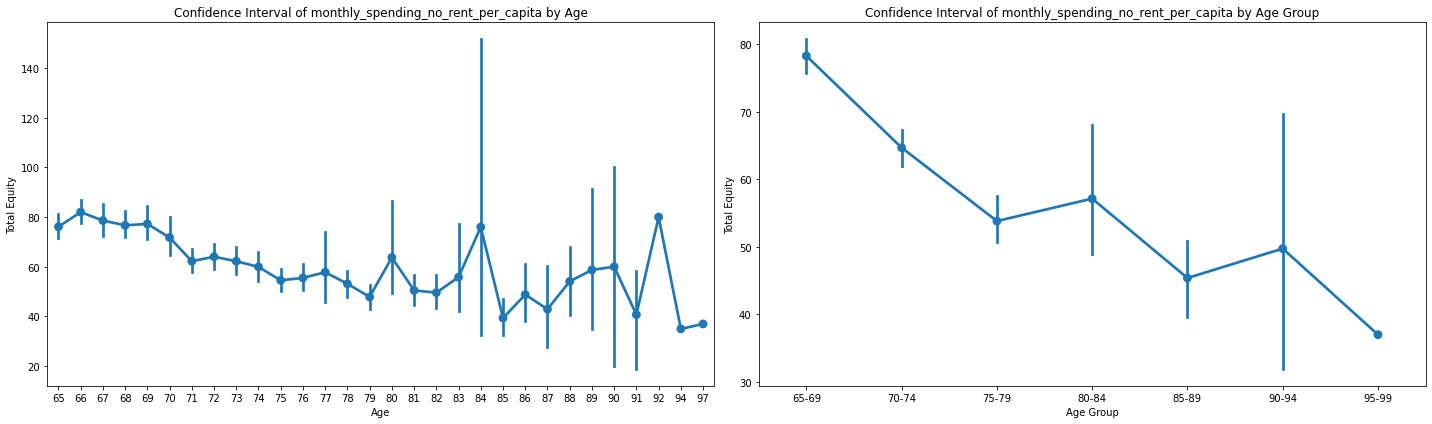

In [29]:
# Creating a new column 'age_group' by binning the 'RES_AGE' into groups of 5 years
bins = np.arange(65, df['RES_AGE'].max() + 5, 5)  # Bins start from 65 to max age, step = 5
labels = [f'{i}-{i+4}' for i in bins[:-1]]  # Labels for each bin (group), e.g., '65-69'
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, labels=labels, right=False)

# Creating a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the first point plot on the first subplot
sns.pointplot(x='RES_AGE', y='monthly_spending_no_rent_per_capita', data=df, ci=95, ax=axes[0])
axes[0].set_title('Confidence Interval of monthly_spending_no_rent_per_capita by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Equity')

# Plotting the second point plot on the second subplot
sns.pointplot(x='age_group', y='monthly_spending_no_rent_per_capita', data=df, ci=95, order=labels, ax=axes[1])
axes[1].set_title('Confidence Interval of monthly_spending_no_rent_per_capita by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Total Equity')

# Displaying the plot
plt.tight_layout()
plt.show()


In [30]:
correlation = df["RES_AGE"].corr(df["monthly_spending_no_rent_per_capita"])
print("Correlation: ", correlation)

Correlation:  -0.17642847196197034


역시 줄어듭니다.

## *재산 및 소비에 대한 분석은 일단 이 정도로 하고, 행복도와 정신건강에 대해 분석을 해봅니다.*